In [1]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
#imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
#imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
#imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
#import CRISPR_free_energy_landscape as FreeEnergy
#imp.reload(FreeEnergy);
import read_model_ID;
# imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
#imp.reload(plt_F)


#import analysis_SA_fits as SAfits
#imp.reload(SAfits);



#  Step 1: Use SA fit to association data from Finkelstein et al.
Using simmulated annealing we minimise the χ2 based on the data with singly and doubly mismatched sequences. Here we show our best fit.

In [2]:
simset = []
no_good = []

chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,13):
    sa = pd.read_csv('../Diewertje/1_3_2019/fit_1_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/1_3_2019/fit_1_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
        
    
best_fit = simset[np.argmin(chi_squared)]
best_fit
# WRONG! SINCE SUCCESS IS FALSE!

'../Diewertje/1_3_2019/fit_1_3_2019_sim_7.txt'

In [3]:
# Load Parameters
model_id = 'init_limit_general_energies_v2'

# To find last line with the fitted parameters
f=open(best_fit)
lines=f.read().splitlines()
last_line=lines[-1]
last_line = last_line.split()
Finkel_params = list(map(float,last_line[:-2]))
print(Finkel_params)

# Nparams = (np.size(Finkel_params) #44
# boyle_params = plt_B.load_simm_anneal(filename, Nparams)

[0.991125322726, -4.39413061905, -5.44831156947, 2.98223935731, 4.62681406378, -4.36186155583, 1.24340165583, 1.80576938762, -3.62948203288, 6.43285067906, -3.12015497376, 4.94761276007, 0.231936748947, -7.87408690747, 9.01202469348, -6.85952199489, -1.56368809509, 1.73237312601, 4.16147389841, 7.99687168206, -8.49861002111, 3.57974999914, 2.53124987224, 4.78887956654, 5.1951366123, 4.90938211698, 5.63712842917, 5.32706337971, 3.84439440693, 5.64436726918, 4.1408411939, 3.51584028409, 3.50026532704, 3.42598808533, 3.79419693695, 6.86867643421, 3.57913724851, 4.59500685852, 4.61857738113, 5.29665125712, -4.93800595926, -1.99433373201, 0.351442662569, 2.90418844562]


In [6]:
# Load data
IlyaData = pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
IlyaData20 = pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv')


# Prediction

TypeError: 'map' object is not subscriptable

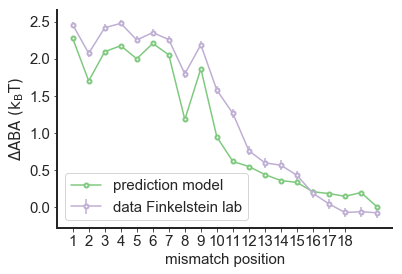

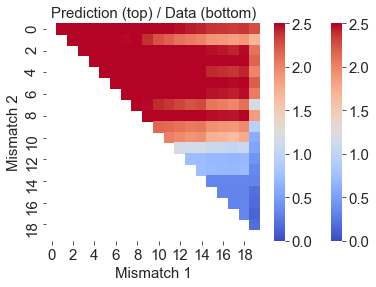

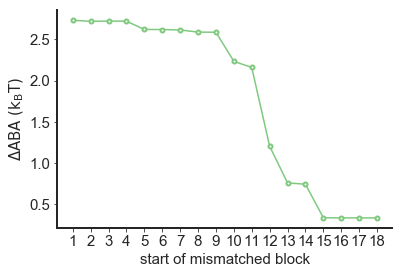

In [8]:
T=60*10
guide_length=20

plt.figure()
_ = pltABA.predict_single_mm(Finkel_params,model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/single_mm.pdf', format='pdf',bbox_inches='tight')

plt.figure()
_ = pltABA.predict_double_mm(Finkel_params,model_id,T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/double_mm_heatmap.pdf', format='pdf',bbox_inches='tight')

#### CANNOT DO THIS FOR DATA WITH ONLY 2 MUTATIONS DATA, SO USE 20 mutation data with parameters from 2 mutation data  #####
plt.figure()
_ = pltABA.predict_1D_mmblocks(Finkel_params, model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData20)
# #plt.savefig('../reports/Skype_call_Ilya_10_12_2018/blocks_collapse_first_position.pdf', format='pdf',bbox_inches='tight')

plt.figure()
_ = pltABA.predict_block_mismatches(Finkel_params, model_id, T,guide_length, show_plot=True, show_data=True, data_file=IlyaData20)